# Comparing the binning schemes

In [23]:
import numpy as np
import matplotlib.pyplot as plt

In [24]:
binning_dir = "./binnings/"
which_run = "injection_1"

# Get a dict with the keys being the waveform and the values being a dict with the keys being either og and new, and the values being the corresponding frequency grid
binnings_dict = {}
for wf in ["TaylorF2", "IMRPhenomD_NRTidalv2"]:
    binnings_dict[wf] = {}
    for ext in ["og", "new"]:
        filename = f"{binning_dir}{which_run}_{wf}_{ext}.npz"
        data = np.load(filename)
        freq_grid = data["freq_grid"] # neglect freq_grid_center for now
        binnings_dict[wf][ext] = freq_grid

Compare lengths for TF2 and NRTv2

In [26]:
print(len(binnings_dict["TaylorF2"]["og"]))
print(len(binnings_dict["IMRPhenomD_NRTidalv2"]["og"]))

print(len(binnings_dict["TaylorF2"]["new"])) #actually the og, overwritten!!!
print(len(binnings_dict["IMRPhenomD_NRTidalv2"]["new"]))

101
101
1001
8455


Are they equal? NOTE: TaylorF2 new is TaylorF2 OG: accidentally overwritten

In [28]:
# np.allclose(binnings_dict["TaylorF2"]["new"], binnings_dict["IMRPhenomD_NRTidalv2"]["new"]) # overwritten!!!

Spacings checking

In [19]:
# spacings_TF2 = np.ediff1d(binnings_dict["TaylorF2"]["new"])
spacings_NRTv2_og = np.ediff1d(binnings_dict["IMRPhenomD_NRTidalv2"]["og"])
spacings_NRTv2_new = np.ediff1d(binnings_dict["IMRPhenomD_NRTidalv2"]["new"])

In [22]:
len(spacings_NRTv2_og)

100

In [17]:
spacings_NRTv2

array([0.00622608, 0.00623004, 0.006234  , ..., 0.21573067, 0.21570588,
       0.21568109])

# Archive

Plotting the bins just visually

len(freq_grid_original)
101
len(freq_grid_new)
8455


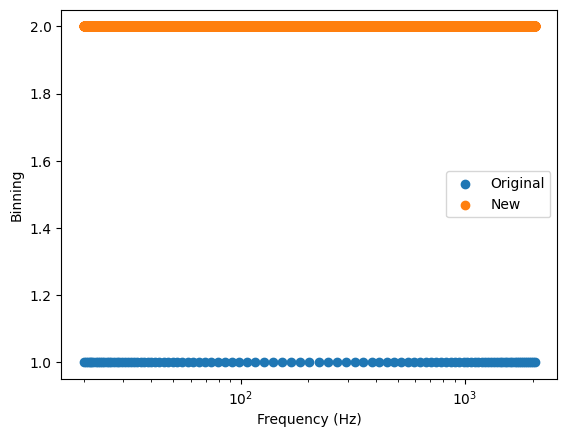

In [6]:
# plt.scatter(freq_grid_original, np.ones_like(freq_grid_original), label="Original")
# plt.scatter(freq_grid_new, 2*np.ones_like(freq_grid_new), label="New")
# print("len(freq_grid_original)")
# print(len(freq_grid_original))
# print("len(freq_grid_new)")
# print(len(freq_grid_new))
# plt.legend()
# plt.xscale("log")
# plt.xlabel("Frequency (Hz)")
# plt.ylabel("Binning")
# plt.show()

In [7]:
freq_grid_new

array([  20.        ,   20.00622608,   20.01245613, ..., 2047.56080053,
       2047.77650641, 2047.9921875 ])

What is ordinary grid spacing?

In [9]:
duration = 128
delta_f = 1.0 / duration

# How many delta f's fit into 20, 2048 Hz?
_n_bins = (2048 - 20) / delta_f
print(_n_bins)

259584.0
